# Building a neural network model

Nowadays, deep learning is becomming a potential tool that everyone wants to explore with the desire of improving accuracy and computational performance in classification and detection problems. However, some people like me, from mathematics or statitics background, may have found  neural networks (NN) as an algorithm that leads to extraordinary results, but with the lack of a clear machanism under the hood that support results; creating certain preference for methods that provide outputs with mathematical base, such as support vector machine or logistic regression. However, it is not completely true that NN is blackbox where magic mainly depend on of a simple structure of input, box and output. The machanism that makes this magic in NN is called backpropagation and I think the math on it is quite deep and need to be understood with detail in order to appreciate from a teoritical and a practical point of view the benefits of applying this technique.

I will show in the next lines the python scripts to make a NN work using a simple dataset under the assumption that our net only contains two layers. Once this is clear I will present the code for a multilayer NN for multilabel purposes.

## A shallow neural network


The heart of backpropagation is the derivative of the cost $\mathcal{J}$ with respect to any weight $w$ (or bias $b$). THe math for a net with two layers is the following:

\begin{equation}\label{eq1}
\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})
\end{equation}

\begin{equation}\label{eq2}
\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} 
\end{equation}

\begin{equation}\label{eq3}
\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}
\end{equation}

\begin{equation}\label{eq4}
\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2})
\end{equation}

\begin{equation}\label{eq5}
\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T 
\end{equation}

\begin{equation}\label{eq6}
\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}
\end{equation}





I show below the points to classify, this is a space defined by two axis and two labels, one red and another blue.

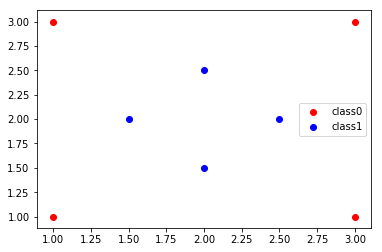

In [320]:
from matplotlib import pyplot as plt
import numpy as np

c0_x = [1,1,3,3]
c0_y = [1,3,3,1]
c1_x = [1.5,2.5,2,2]
c1_y = [2,2,2.5,1.5]

plt.scatter(c0_x,c0_y,c='red',label = 'class0')
plt.scatter(c1_x,c1_y,c='blue',label = 'class1')
plt.legend()
plt.show()

In [321]:
x1 = [1,1,3,3,1.5,2.5,2,2]
x2 = [1,3,3,1,2,2,2.5,1.5]
X = np.array([[i,j] for i,j in zip(x1,x2)]).T
Y = np.array([0,0,0,0,1,1,1,1]).reshape(1,8)

In [322]:
Y

array([[0, 0, 0, 0, 1, 1, 1, 1]])

Let's initialze the weights both layer 1 and 2, with the same number of neurons nh. Besides that, in the NN we always have classes - 1 number of units in the outcome, that's why ny takes the value of 1.

In [323]:
def initialparameters(nx,nh,ny):
    '''
    input:
    nx = number of features
    nh = number of neurons 
    ny = number of classes
    output:
    W1 = weight matrix layer 1 of size (nh,nx) 
    b1 = bias vector layer 1 of size (nh,1)
    W2 = weight matrix layer 2 of size (ny,nh)
    b2 = bias vector layer 2 of size (ny,1)
    '''
    np.random.seed(2)
    W1 = np.random.randn(nh,nx)*0.01
    b1 = np.zeros((nh,1))*0.01
    W2 = np.random.randn(ny,nh)*0.01
    b2 = np.zeros((ny,1))*0.01
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2,
                }

    return parameters


In [324]:
parameters = initialparameters(2,3,1)
parameters['W2']

array([[ 0.00502881, -0.01245288, -0.01057952]])

forwardpropagation, first layer with tanh transformation and second layer with sigmoid

In [325]:
def sigmoid(x):
    z = 1/(1+np.exp(-x))
    return z


def forward_propagation(X, parameters):
    '''
    input:
    X = features with size (nx,m)
    parameters = paython dictionary with the initialization of the weights
    
    output:
    A2 = second activation layer
    cache = python dictionary with the outputs of the fordware propagation
    '''
    W1 = parameters['W1']  # (nh,nx) 
    b1 = parameters['b1']  # (nh,1)
    W2 = parameters['W2']  # (ny,nh)
    b2 = parameters['b2']  # (ny,1)
    
    #propagation
    Z1 = np.dot(W1,X) + b1   # Size (nh,m) 
    A1 = np.tanh(Z1)         # Size (nh,m)
    Z2 = np.dot(W2,A1) + b2  # Size (ny,m)
    A2 = sigmoid(Z2)         # Size (ny,m)
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2}
    return A2, cache

In [326]:
A2,cache = forward_propagation(X, parameters)
cache['A1']

array([[-0.00473021, -0.00585552, -0.01418979, -0.01306466, -0.00737657,
        -0.01154377, -0.00974152, -0.0091789 ],
       [-0.00495921,  0.02783897, -0.01487666, -0.04764707,  0.00076247,
        -0.02059657, -0.00171715, -0.01811788],
       [-0.02634573, -0.04315995, -0.07889121, -0.06214037, -0.04370861,
        -0.06159277, -0.05685103, -0.04845694]])

Computing cost

In [327]:
def computing_cost(A2,Y):
    '''
    input:
    A2 = activation layer 2
    y = vector with labels one and cero, size (1,m)
    output:
    cost = cost entropy
    '''
    m = Y.shape[1] # number of samples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2),Y)
    cost = - np.sum(logprobs)
    return cost

cost = computing_cost(A2,Y)
cost

2.7713230116693381

after fordware propagation with set out the calculation of gradient descendent 

In [328]:
def backpropagation(cache, parameters, X,Y):
    '''
    input:
    cache: python dictionary with the matrices after activation
    parameters:python dictionary with the weights
    X: features input size (nx,m)
    Y: vector with labels one and cero, size (1,m)
    
    output:
    grads: python dictionary with the derivaties of every step in the backpropagation
    '''
    m = X.shape[1]
    # parameters
    W1 = parameters['W1']   # Size (nx,nh)
    b1 = parameters['b1']   # Size (nh,1)
    W2 = parameters['W2']   # Size (ny,nh)
    b2 = parameters['b2']   # Size (ny,1)
    # cache
    Z1 = cache['Z1']        # Size (nh,m)
    A1 = cache['A1']        # Size (nh,m)
    Z2 = cache['Z2']        # Size (ny,m)
    A2 = cache['A2']        # Size (ny,m)
    
    #Derivatives
    dZ2 = A2 - Y            # Size (ny,m)
    dW2 = (1/m)*np.dot(dZ2,A1.T)  # Size (ny,nh)
    db2 = (1/m)*np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1 - np.power(A1,2))) # Size (nh,m)
    dW1 = (1/m)*np.dot(dZ1,X.T)  # Size (nh,nx)
    db1 = (1/m)*np.sum(dZ1, axis=1,keepdims=True)
     
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [329]:
grads = backpropagation(cache, parameters, X,Y)
grads

{'dW1': array([[  1.77228392e-06,   1.45679749e-06],
        [  4.01706116e-07,  -6.69303581e-07],
        [  2.17355314e-06,   6.79233396e-07]]),
 'db1': array([[  7.76043141e-07],
        [  4.37684607e-09],
        [ -7.69816639e-07]]),
 'dW2': array([[ -1.70510647e-06,  -1.57245277e-06,  -4.77448275e-06]]),
 'db2': array([[ 0.00015821]])}

To update the parameters we propose to use gradient descent

In [330]:
def updating_gradients(parameters, grads, learning_rate = 1.5):
    '''
    input:
    parameters = python dictionary with the weigths and bias matrices
    grads = matrices with the derivaties in NN
    
    output:
    parameters = python dictionary with the updated parmeters        
    '''
    #parameters
    W1 = parameters['W1']   # Size (nx,nh)
    b1 = parameters['b1']   # Size (nh,1)
    W2 = parameters['W2']   # Size (ny,nh)
    b2 = parameters['b2']   # Size (ny,1)
    #grads
    dW1 = grads['dW1']
    dW2 = grads['dW2']    
    db1 = grads['db1']
    db2 = grads['db2']
    
    #updating
    
    W1 += -dW1*learning_rate
    W2 += -dW2*learning_rate
    b1 += -db1*learning_rate
    b2 += -db2*learning_rate
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [331]:
parameters = updating_gradients(parameters, grads)

In [332]:
parameters

{'W1': array([[-0.00417024, -0.00056485],
        [-0.02136256,  0.01640371],
        [-0.01793762, -0.00841849]]), 'b1': array([[ -1.16406471e-06],
        [ -6.56526911e-09],
        [  1.15472496e-06]]), 'W2': array([[ 0.00503137, -0.01245052, -0.01057236]]), 'b2': array([[-0.00023731]])}

Integration of functions

In [333]:
import sys
import time

def NN_model(X,Y,nh,number_iterations = 1000):
    '''
    input:
    X: input matrix with features zise(2,m)
    Y: labels of shape (1, m)
    nh: number of neurons
    number_iterations: number of iterations in gradient descent loop
    
    output:
    parameters: parameters learnt by the model
    '''
    nx = X.shape[0]
    #initializing parameters
    parameters = initialparameters(nx,nh,1)
    
    W1 = parameters['W1']   # Size (nx,nh)
    b1 = parameters['b1']   # Size (nh,1)
    W2 = parameters['W2']   # Size (ny,nh)
    b2 = parameters['b2']   # Size (ny,1)
    
    for i in range(0, number_iterations):
        A2,cache = forward_propagation(X, parameters)
        # Cost function
        cost = computing_cost(A2,Y)
        # Backpropagation
        grads = backpropagation(cache, parameters, X,Y)
        # gradient descent
        parameters = updating_gradients(parameters, grads)
        
        #time.sleep(0.2) # do real work here
        # update the bar
        #sys.stdout.write("=")
        #sys.stdout.flush()
        if i % 1000 == 0:
            print(f'The cost for iteration {i} is {cost}')
    return parameters

In [334]:
parameters = NN_model(X, Y, nh = 4, number_iterations=10000)
parameters

The cost for iteration 0 is 2.773469712862777
The cost for iteration 1000 is 2.7725821884411745
The cost for iteration 2000 is 0.950660367107952
The cost for iteration 3000 is 0.9010276633481851
The cost for iteration 4000 is 0.03162956509092786
The cost for iteration 5000 is 0.006605055845842714
The cost for iteration 6000 is 0.0035821661714255724
The cost for iteration 7000 is 0.002431933662585699
The cost for iteration 8000 is 0.0018315446212868315
The cost for iteration 9000 is 0.0014645798060323881


{'W1': array([[ 1.91892954,  1.6568821 ],
        [-6.7532347 ,  0.25133867],
        [-3.18144007, -0.56336961],
        [-2.78190131,  5.01933569]]), 'b1': array([[ 0.19470794],
        [ 8.23721099],
        [ 9.99953013],
        [ 0.51274215]]), 'W2': array([[-5.46752197, -8.9501284 ,  9.04806195,  4.30983623]]), 'b2': array([[-7.27987398]])}

let's make a prediction

In [335]:
def predict(X, parameters):
    '''
    input:
    X = matrix with the input samples and features
    parameters = python dictionary with the optimization of the parameters
    
    output:
    A2 = vector with the predictions
    '''
    
    A2,cache = forward_propagation(X, parameters)
    predictions = np.where(A2<0.5,0,1)
    
    return predictions   

In [336]:
x1, x2 = np.meshgrid(np.arange(0,3.5,0.1), np.arange(0,3.5,0.1))
xx = np.array((x1.reshape(-1),x2.reshape(-1)))
res = predict(xx, parameters)

Decision boundary

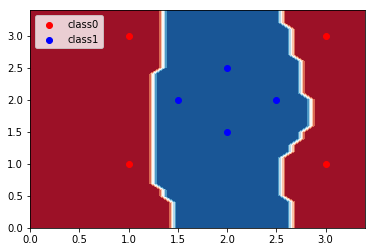

In [337]:
from matplotlib import pyplot as plt
cm = plt.cm.RdBu
plt.contourf(x1, x2, res.reshape((x1.shape)), cmap=cm)
plt.scatter(c0_x,c0_y,c='red',label = 'class0')
plt.scatter(c1_x,c1_y,c='blue',label = 'class1')
plt.legend()
plt.show()

### First conclusion

In this template, I have introduced the function of a shallow NN with the purpose of a binary classification. Well, my final goal is to show a NN model for multiple layers and multilabel output. Therefore, let's start coding this.

# A Deep Neural Network model

In contrary to the last section, the main objective is to include in a net different number of layers with different number of neurons. Moreover, instead of classifying between two classes, I will introduce the code for multilabel classification. It should be noticed that I will develop a net taking as example the iris dataset. Let define the cartesian planes for each arrangement of coordinates.

In [338]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X_iris = iris['data']
Y_iris = iris['target'].reshape(len(X_iris),1)
Y_iris.shape

(150, 1)

/home/willimarti2008/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  


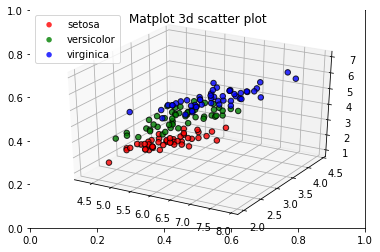

In [339]:
labels = (0, 1, 2)
colors = ("red", "green", "blue")
groups = iris['target_names']

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')

for labels, color, group in zip(labels, colors, groups):
    x = X_iris[np.where(Y_iris == labels)[0],0]
    y = X_iris[np.where(Y_iris == labels)[0],1]
    z = X_iris[np.where(Y_iris == labels)[0],2]
    
    ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot 3d scatter plot')
plt.legend(loc=2)
plt.show()

In [340]:
nx = 4
nh = [4,5]
ny = 3

let's create the weigths

In [341]:
def initialparameters_mult(nx,nh,ny):
    '''
    input:
    nx = number of features
    nh = a list with the number of neurons in every element
    ny = number of classes
    output:
    W = python dictionary with the multiple weight matrices with regard layer L 
    b = 
    '''
    layers = [nx] + nh + [ny]
    layers
    
    parameters_W = {}
    parameters_b = {}
    for l in range(1,len(layers)):
        parameters_W[f'W{l}'] = np.random.randn(layers[l],layers[l-1])*0.01
        parameters_b[f'b{l}'] = np.zeros((layers[l],1))*0.01
    
    return parameters_b, parameters_W     

In [342]:
parameters_b, parameters_W  = initialparameters_mult(nx,nh,ny)
parameters_W['W3'].shape

(3, 5)

In [343]:
#softmax function
def softmax(y):
    delta = np.exp(y)/np.sum(np.exp(y))
    return delta

def forward_propagation_mult(X, parameters_W, parameters_b):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the L activation
    cache -- a dictionary containing "Z1", "A1", "Z2","A2",..."ZL", "AL"
    
    Note: using tanh as activation function
    """
    
    Z1 = np.dot(parameters_W[f'W{1}'],X) + parameters_b[f'b{1}']
    Al = np.tanh(Z1)
    cache_Z = {}
    cache_A = {}
    cache_Z['Z1'] = Z1
    cache_A['A1'] = Al
    for l in range(2,len(parameters_W) + 1):    
        Zl = np.dot(parameters_W[f'W{l}'],Al) + parameters_b[f'b{l}']
        if l != (len(parameters_W)):
            Al = np.tanh(Zl)
        else:
            Al = np.apply_along_axis(softmax,0,Zl)
        cache_Z[f'Z{l}'] = Zl
        cache_A[f'A{l}'] = Al
    
    return Al ,cache_Z, cache_A
    

In [344]:
Al, cache_Z, cache_A = forward_propagation_mult(X_iris.T, parameters_W, parameters_b)
cache_A['A3'].shape

(3, 150)

$y$ must be convertein a matrix in term of ceros and ones

In [345]:
def conversion(Y):
    labels = np.unique(Y)
    a = {}
    j = 0
    for i in labels:
        b = np.zeros(len(labels))
        b[j] = 1
        a[i] = b
        j += 1

    categories = np.apply_along_axis(lambda x: a[x[0]],1,Y)    
    return categories

def computing_cost_mult(Al,Y):
    '''
    input:
    A2 = activation layer 2
    y = vector with labels one and cero, size (1,m)
    output:
    cost = cost entropy
    '''
    YC = conversion(Y)
    # Compute the cross-entropy cost
    AY = np.multiply(Al.T,YC)
    sumprobs = np.apply_along_axis(sum,1,AY)
    cost = - np.sum(sumprobs)

    return cost 

cost = computing_cost_mult(Al,Y_iris)
cost

-50.000045215847152

## gradient descendent

This is on development

In [346]:
def backpropagation_mut(cache, parameters, X,Y):
    '''
    input:
    cache: python dictionary with the matrices after activation
    parameters:python dictionary with the weights
    X: features input size (nx,m)
    Y: vector with labels one and cero, size (1,m)
    
    output:
    grads: python dictionary with the derivaties of every step in the backpropagation
    '''
    
    m = X.shape[1]
    # parameters
    W1 = parameters['W1']   # Size (nx,nh)
    b1 = parameters['b1']   # Size (nh,1)
    W2 = parameters['W2']   # Size (ny,nh)
    b2 = parameters['b2']   # Size (ny,1)
    # cache
    Z1 = cache['Z1']        # Size (nh,m)
    A1 = cache['A1']        # Size (nh,m)
    Z2 = cache['Z2']        # Size (ny,m)
    A2 = cache['A2']        # Size (ny,m)
    
    #Derivatives
    dZ2 = A2 - Y            # Size (ny,m)
    dW2 = (1/m)*np.dot(dZ2,A1.T)  # Size (ny,nh)
    db2 = (1/m)*np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1 - np.power(A1,2))) # Size (nh,m)
    dW1 = (1/m)*np.dot(dZ1,X.T)  # Size (nh,nx)
    db1 = (1/m)*np.sum(dZ1, axis=1,keepdims=True)
     
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads